In [1]:
import sys
assert sys.version_info >= (3,5)

#is this notebook running on Colab or Kaggle? # 코랩에서 실행되냐?
IS_COLAB = "google.colab" in sys.modules

#Scikit-learn >= 0.20 is required # 사이킷런 버전 설정
import sklearn
assert sklearn.__version__ >= "0.20"

#Common imports #당연히 임포트 하는 것들 
import numpy as np
import os

#to make this notebook's output stable across runs # ??
np.random.seed(42)

# To plot pretty figures # matplotlib 설정?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Where to save the figures # 어디에 저장할지?
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#png로 저장하는 함수
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd

HOUSING_PATH = "datasets"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "emnist-digits-train.csv")
    return pd.read_csv(csv_path) 

In [5]:
emnist = load_housing_data()

In [8]:
emnist

,8,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239994,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
emnist.keys()

Index(['8', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.511', '0.512', '0.513', '0.514', '0.515', '0.516', '0.517', '0.518',
       '0.519', '0.520'],
      dtype='object', length=785)

### train data, target 분류

In [91]:
X = emnist.loc[:, emnist.columns != '8'].values # .values -> numpy array로 변환
y = emnist.loc[:, ['8']].values

print(type(X))
print(X.shape)
print(X)

print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(239999, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
(239999, 1)
[[9]
 [6]
 [3]
 ...
 [1]
 [1]
 [0]]


### 이미지 출력 함수

In [55]:
def show_img(data, target):
    digit_img = data.reshape(28,28) # data[0]을 28 * 28로 reshape
    plt.imshow(digit_img, cmap=mpl.cm.binary)
    plt.axis("off")
    plt.show()
    print("target :", target)

### 샘플 확인

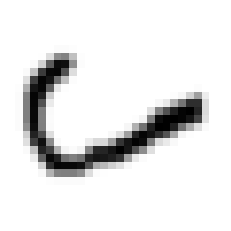

target : [7]


In [56]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# some_digit = X[5]
# some_digit_image = some_digit.reshape(28,28) # data[0]을 28 * 28로 reshape
# plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.axis("off")

# save_fig("some_plot") # 이미지 이름
# plt.show()
# print("target :", y[5])

show_img(X[5], y[5])

### -10도 회전시킨 데이터를 추가

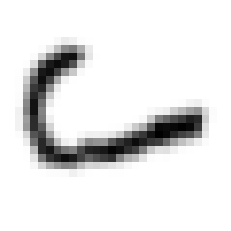

target : [7]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   7  20  15   3   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   3  20  65 117 131  81  21   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   4  40 118 182 233 237 135  26   1
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   2  35 160 227 242 226 172  52   5   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   1  20 109 228 239 189 109  55   6
   0   0   0   0   0   0   0   0   0  

In [79]:
import scipy.ndimage

def rotate_data_func(data):
    rotate_data = scipy.ndimage.interpolation.rotate(data.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
    return rotate_data

show_img(rotate_data_func(X[5]), y[5])

print(rotate_data_func(X[5]).reshape(784))

#### X_rotate, y_rotate 생성

In [162]:
X_rotate = []
y_rotate = []    

for image, label in zip(X, y):
    X_rotate.append([rotate_data_func(image).reshape(784)])
    y_rotate.append([label])
    
X_rotate = np.asarray(X_rotate)
y_rotate = np.asarray(y_rotate)
X_rotate = np.vstack(X_rotate)
y_rotate = np.vstack(y_rotate)

print(X_rotate.shape)
print(y_rotate.shape)

(239999, 784)
(239999, 1)


#### 데이터 합치기

X + X_rotate

y + y_rotate  

In [170]:
X_total = np.concatenate((X, X_rotate), axis=0)
y_total = np.concatenate((y, y_rotate), axis=0)

print(X_total.shape)
print(y_total.shape)

(479998, 784)
(479998, 1)


#### train set 완성

In [171]:
import numpy as np
shuffle_index = np.random.permutation(479998)
x_train, y_train = X_total[shuffle_index], y_total[shuffle_index]

### 우선 RandomForestClassifier 사용해보기

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_cv_score = cross_val_score(forest_clf, x_train, np.ravel(y_train), cv=10, scoring="accuracy")

array([0.984625  , 0.983625  , 0.98385417, 0.984125  , 0.98335417,
       0.98391667, 0.98402083, 0.98304167, 0.98404133, 0.98366633])

In [177]:
np.mean([0.984625  , 0.983625  , 0.98385417, 0.984125  , 0.98335417,
       0.98391667, 0.98402083, 0.98304167, 0.98404133, 0.98366633])

0.983827017